# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import nltk
#%matplotlib inline

In [2]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Djscr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size= 100,
    sort_by='relevancy'
)

print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

Total articles about Bitcoin: 4554


In [6]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size= 100,
    sort_by='relevancy'
)

print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

Total articles about Ethereum: 1233


In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        bitcoin_sentiment.append({
            "Date": date,
            "Text": text,
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
        })

    except AttributeError:
        pass

# Dataframe
bitcoin_df = pd.DataFrame(bitcoin_sentiment)
bitcoin_df_columns = ["Date", "Text", "Compound", "Positive", "Neutral", "Negative"]
bitcoin_df = bitcoin_df[bitcoin_df_columns]

bitcoin_df.head()

,Date,Text,Compound,Positive,Neutral,Negative
0,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.838,0.000
1,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.950,0.000
2,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,1.000,0.000
3,2020-11-25,If youve been watching the crypto markets over...,0.4404,0.152,0.773,0.075
4,2020-12-09,Six years after the launch of the Mexico-based...,0.0000,0.000,1.000,0.000


In [8]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiment = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        ethereum_sentiment.append({
            "Date": date,
            "Text": text,
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
        })

    except AttributeError:
        pass

# Dataframe
ethereum_df = pd.DataFrame(ethereum_sentiment)
ethereum_df_columns = ["Date", "Text", "Compound", "Positive", "Neutral", "Negative"]
ethereum_df = ethereum_df[ethereum_df_columns]

ethereum_df.head()

,Date,Text,Compound,Positive,Neutral,Negative
0,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,1.000,0.0
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,1.000,0.0
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.912,0.0
3,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.948,0.0
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.948,0.0


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Neutral,Negative
count,99.000000,99.000000,99.000000,99.000000
mean,0.155236,0.054525,0.927717,0.017768
std,0.320833,0.065958,0.077826,0.046198
min,-0.946800,0.000000,0.637000,0.000000
25%,0.000000,0.000000,0.860500,0.000000
50%,0.000000,0.038000,0.948000,0.000000
75%,0.396900,0.117000,1.000000,0.000000
max,0.877900,0.318000,1.000000,0.363000


In [10]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Neutral,Negative
count,96.000000,96.000000,96.000000,96.000000
mean,0.228508,0.079510,0.897625,0.022854
std,0.365195,0.079617,0.093933,0.049105
min,-0.779200,0.000000,0.653000,0.000000
25%,0.000000,0.000000,0.838250,0.000000
50%,0.214300,0.073000,0.913000,0.000000
75%,0.493900,0.132000,1.000000,0.000000
max,0.883400,0.347000,1.000000,0.239000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum with 0.079

Q: Which coin had the highest compound score?

A: Bitcoin with 99.0

Q. Which coin had the highest positive score?

A: Ethereum with 0.35

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Expand the default stopwords list if necessary
nltk.download('stopwords')
nltk.download('wordnet')
add_stopwords={'file', 'photo', 'reuters', '', 'staff', 'char', 'virtual', 'currency', 'ruvicillustration', 'reutersdado'}

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Djscr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Djscr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    tokenized_words=word_tokenize(text)

    # Convert the words to lowercase
    lowercase_words=[word.lower() for word in tokenized_words]
    
    # Remove the punctuation
    regex=re.compile("[^a-zA-Z]")
    regex_words=[regex.sub("", word) for word in lowercase_words]
    
    # Remove the stop words
    stop_it=set(stopwords.words('english'))
    remove_stopwords=[word.lower() for word in regex_words if word not in stop_it.union(add_stopwords)]
    
    # Lemmatize Words into root words
    lemmatizer=WordNetLemmatizer()
    tokens=[lemmatizer.lemmatize(word) for word in remove_stopwords]
    
    return tokens


In [20]:
# Create a new tokens column for bitcoin
bitcoin_tokens = [tokenizer(headline) for headline in bitcoin_df["Text"]]
bitcoin_df["Tokens"] = bitcoin_tokens

bitcoin_df.head(10)

,Date,Text,Compound,Positive,Neutral,Negative,Tokens
0,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.838,0.000,"[visa, partnered, cryptocurrency, startup, blo..."
1,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.950,0.000,"[november, absolutely, massive, twomonth, rall..."
2,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,1.000,0.000,"[unlike, conventional, cryptocurrencies, centr..."
3,2020-11-25,If youve been watching the crypto markets over...,0.4404,0.152,0.773,0.075,"[youve, watching, crypto, market, past, week, ..."
4,2020-12-09,Six years after the launch of the Mexico-based...,0.0000,0.000,1.000,0.000,"[six, year, launch, mexicobased, crypotcurrenc..."
5,2020-12-03,Decentralized exchange protocols that allow cr...,0.4019,0.117,0.883,0.000,"[decentralized, exchange, protocol, allow, cry..."
6,2020-11-30,4. U.S. markets ended November with large gain...,0.7650,0.171,0.829,0.000,"[u, market, ended, november, large, gain, even..."
7,2020-11-17,"Maisie Williams also known as Arya Stark, daug...",0.0000,0.000,1.000,0.000,"[maisie, williams, also, known, arya, stark, d..."
8,2020-11-18,8 with 7 posters participating\r\nBitcoin rose...,0.6249,0.174,0.826,0.000,"[poster, participating, bitcoin, rose, tuesday..."
9,2020-11-17,FILE PHOTO: Representations of virtual currenc...,0.0000,0.000,1.000,0.000,"[representation, bitcoin, seen, picture, illus..."


In [22]:
# Create a new tokens column for ethereum
ethereum_tokens=[tokenizer(headline) for headline in ethereum_df["Text"]]
ethereum_df["Tokens"]=ethereum_tokens

ethereum_df.head(10)

,Date,Text,Compound,Positive,Neutral,Negative,Tokens
0,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,1.000,0.0,"[representation, ethereum, standing, pc, mothe..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,1.000,0.0,"[representation, ethereum, standing, pc, mothe..."
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.912,0.0,"[london, digital, currency, ethereum, xrp, soa..."
3,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.948,0.0,"[new, york, institutional, investor, pumped, m..."
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.948,0.0,"[new, york, institutional, investor, pumped, m..."
5,2020-11-19,"PayPal has launched the Generosity Network, a ...",0.8779,0.318,0.682,0.0,"[paypal, launched, generosity, network, platfo..."
6,2020-11-26,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,1.000,0.0,"[representation, bitcoin, seen, front, stock, ..."
7,2020-11-26,By Reuters Staff\r\nFILE PHOTO: A representati...,0.0000,0.000,1.000,0.0,"[representation, bitcoin, seen, front, stock, ..."
8,2020-11-26,The New York Times is (probably) about to publ...,0.0000,0.000,1.000,0.0,"[new, york, time, probably, publish, story, cr..."
9,2020-12-03,Decentralized exchange protocols that allow cr...,0.4019,0.117,0.883,0.0,"[decentralized, exchange, protocol, allow, cry..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [23]:
from collections import Counter
from nltk import ngrams

In [31]:
# Generate the Bitcoin N-grams where N=2

# Create a function to list all words in tyhe tokens column in a long list
def bigrams(df_column):
    """
    Joins all the words in the column into a single list and returns bigrams
    """
    all_words = [" ".join(word) for word in df_column]

    # Get bigrams
    processed = tokenizer(str(all_words))
    bigram = ngrams(processed, n= 2)

    return bigram

# Bitcoin bigrams
bitcoin_bigram = bigrams(bitcoin_df["Tokens"])
bitcoin_frequency = Counter(bitcoin_bigram).most_common(20)
bitcoin_frequency

[(('representation', 'bitcoin'), 23),
 (('illustration', 'taken'), 23),
 (('bitcoin', 'seen'), 19),
 (('new', 'york'), 17),
 (('taken', 'november'), 12),
 (('london', 'bitcoin'), 11),
 (('seen', 'illustration'), 9),
 (('york', 'bitcoin'), 9),
 (('picture', 'illustration'), 8),
 (('taken', 'taken'), 8),
 (('taken', 'march'), 8),
 (('seen', 'picture'), 7),
 (('seen', 'front'), 7),
 (('march', 'ruvic'), 6),
 (('stock', 'graph'), 6),
 (('asset', 'manager'), 6),
 (('posted', 'bitcoin'), 5),
 (('alltime', 'high'), 5),
 (('front', 'stock'), 5),
 (('graph', 'illustration'), 5)]

In [32]:
# Generate the Ethereum N-grams where N=2
ethereum_bigram = bigrams(ethereum_df["Tokens"])
ethereum_frequency = Counter(ethereum_bigram).most_common(20)
ethereum_frequency

[(('new', 'york'), 7),
 (('representation', 'bitcoin'), 7),
 (('illustration', 'taken'), 7),
 (('bitcoin', 'seen'), 6),
 (('ul', 'li'), 6),
 (('seen', 'illustration'), 5),
 (('taken', 'november'), 5),
 (('ripple', 'xrp'), 5),
 (('bitcoin', 'price'), 5),
 (('ethereum', 'blockchain'), 5),
 (('institutional', 'investor'), 4),
 (('last', 'month'), 4),
 (('york', 'bitcoin'), 4),
 (('highest', 'level'), 4),
 (('bitcoin', 'ethereum'), 4),
 (('representation', 'ethereum'), 3),
 (('november', 'ruvicillustrationfile'), 3),
 (('cryptocurrency', 'exchange'), 3),
 (('growing', 'number'), 3),
 (('london', 'bitcoin'), 3)]

In [34]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [35]:
# Get the top 10 words for Bitcoin
bitcoin_all_words=''.join(bitcoin_df["Text"])
bitcoin_all_words_tokenized=tokenizer(bitcoin_all_words)
bitcoin_top_10=token_count(bitcoin_all_words_tokenized)

bitcoin_top_10

[('char', 98),
 ('bitcoin', 88),
 ('taken', 31),
 ('seen', 27),
 ('illustration', 27),
 ('representation', 26),
 ('london', 26),
 ('new', 21),
 ('cryptocurrency', 20),
 ('york', 20)]

In [36]:
# Get the top 10 words for Ethereum
ethereum_all_words = " ".join(ethereum_df["Text"])
ethereum_all_words_tokenized = tokenizer(ethereum_all_words)
ethereum_top_10 = token_count(ethereum_all_words_tokenized)

ethereum_top_10

[('char', 96),
 ('ethereum', 56),
 ('bitcoin', 47),
 ('cryptocurrency', 15),
 ('blockchain', 15),
 ('price', 15),
 ('new', 14),
 ('year', 14),
 ('asset', 11),
 ('li', 11)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]


Bad key savefig.frameon in file C:\Users\Djscr\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\Djscr\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\Djscr\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get 

(-0.5, 399.5, 199.5, -0.5)

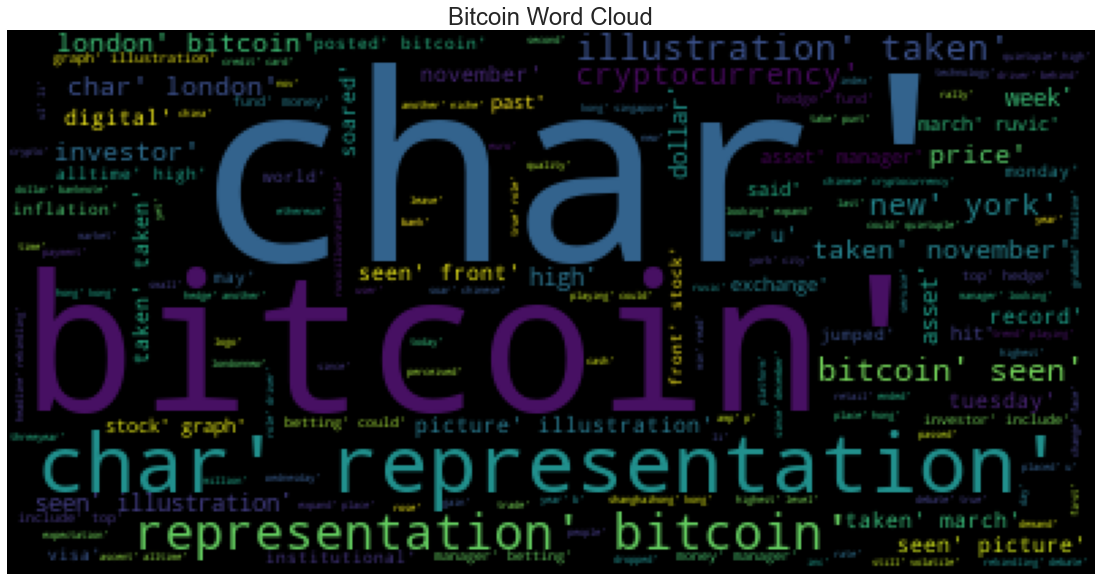

In [38]:
# Generate the Bitcoin word cloud
bitcoin_wc=WordCloud().generate(str(bitcoin_all_words_tokenized))

plt.imshow(bitcoin_wc)
plt.title("Bitcoin Word Cloud",
         fontdict={'size':24}
)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

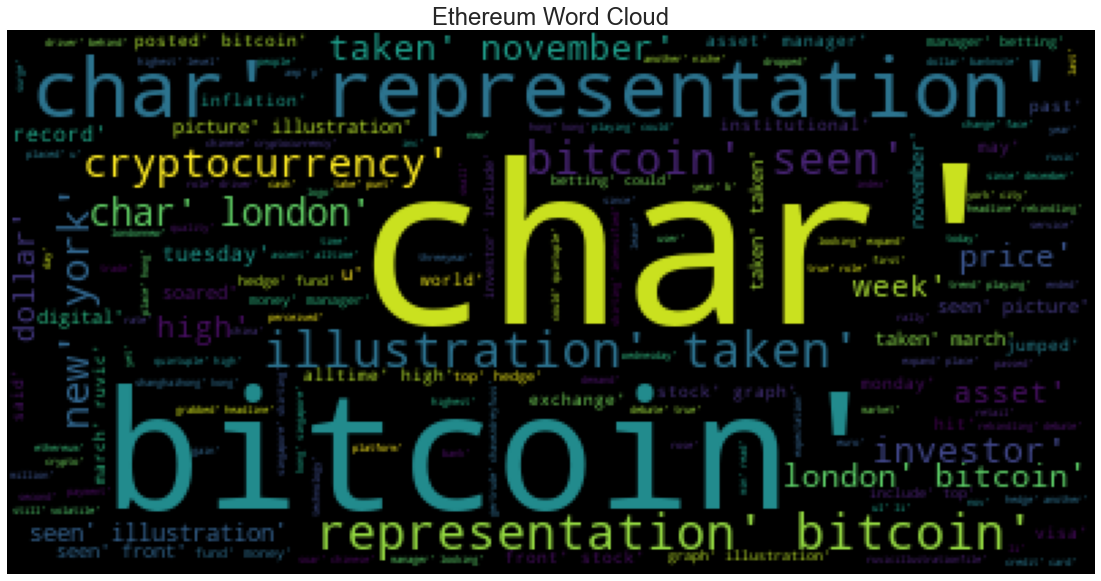

In [39]:
# Generate the Ethereum word cloud
ethereum_wc=WordCloud().generate(str(bitcoin_all_words_tokenized))

plt.imshow(ethereum_wc)
plt.title("Ethereum Word Cloud",
         fontdict={'size':24}
)
plt.axis('off')

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [40]:
import spacy
from spacy import displacy

In [42]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.1-py3-none-any.whl size=12047113 sha256=3b7267d9fd9231bb01761bc6af37474454ec3aedf601bd7a7c93354b3005e9b2
  Stored in directory: C:\Users\Djscr\AppData\Local\Temp\pip-ephem-wheel-cache-xpm2qtcp\wheels\b7\0d\f0\7ecae8427c515065d75410989e15e5785dd3975fe06e795cd9
Successfully built en-core-web-sm
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [43]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [45]:
# Concatenate all of the bitcoin text together
bitcoin_all_words

'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars]Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives the country more power and, in theory, more stability than freq… [+366 chars]If youve been watching the crypto markets over the past few weeks youll have noticed something special: bitcoin, everyones favorite decentralized digital currency based on hype, lies, and general mal… [+2490 chars]Six years after the launch of the Mexico-based crypotcurrency exchange and financial services platform Bitso the company revealed it has clos

In [46]:
# Run the NER processor on all of the text
bitcoin_ner=nlp(bitcoin_all_words)
# Add a title to the document
bitcoin_ner.user_data["title"]='Bitcoin NER'

In [47]:
# Render the visualization
displacy.render(bitcoin_ner,style='ent')

In [48]:
# List all Entities
for ent in bitcoin_ner.ents:
    print(ent.text,ent.label_)

Visa ORG
first ORDINAL
Bitcoin GPE
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Mexico GPE
$62 million MONEY
chars]4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Williams PERSON
Arya Stark PERSON
Lady Catelyn PERSON
Eddard PERSON
acolyte PERSON
the Faceless Men WORK_OF_ART
Monday DATE
chars]8 CARDINAL
7 CARDINAL
Bitcoin GPE
above $18,000 MONEY
Tuesday DATE
evening TIME
December 2017 DATE
this week DATE
more than $18,000 MONEY
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Tom Wilson PERSON
Justin HarperBusiness ORG
BBC News ORG
Bitcoin GPE
above $17,000 MONEY
12,800 MONEY
three-year DATE
Bitcoin GPE
this week DATE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/Dado Ruvic/Illustration ORG
Reuters ORG
Bitcoin GPE
February 3, 2018 DAT

---

## Ethereum NER

In [49]:
# Concatenate all of the bitcoin text together
ethereum_all_words

'FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars] NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the second highest on record, pushing the sectors assets under manag… [+1888 chars] NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, th

In [50]:
# Run the NER processor on all of the text
ethereum_ner=nlp(ethereum_all_words)
# Add a title to the document
ethereum_ner.user_data['title']='Ethereum NER'

In [51]:
# Render the visualization
displacy.render(ethereum_ner,style='ent')

In [52]:
# List all Entities
for ent in ethereum_ner.ents:
    print(ent.text,ent.label_)

February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
PayPal PERSON
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
The New York Times ORG
Coinbase ORG
early February this year DATE
last month DATE
October DATE
$24 million MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
REUTERS/ ORG
Reuters ORG
Hala Systems ORG
Hedera ORG
Syrians NORP
Hala Systems ORG
Bitcoin GPE
the Plug and 